In [ ]:
import openmc
import os 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import sys 
import numpy as np

CWD = Path.cwd().resolve()
project_root = Path.cwd().parents[2]
sys.path.append(str(project_root))

from parameters.parameters_paths import PATH_TO_CROSS_SECTIONS
from src.utils.pre_processing.pre_processing import *
from src.utils.common.isotope import Isotope

os.environ["OPENMC_CROSS_SECTIONS"] = PATH_TO_CROSS_SECTIONS


In [ ]:
# define a isotope class with the name, decay constant and half life and a method to return the massic activity
# class Isotope:
#     def __init__(self, name):
#         self.name = name
#         self.decay_constant = openmc.data.decay_constant(isotope=name)
#         self.half_life = openmc.data.half_life(isotope=name)
#         self.atomic_mass = openmc.data.atomic_mass(isotope=name)

#     @property
#     def massic_activity(self):
#         return (6.022e23 * np.log(2)) / (self.atomic_mass * self.half_life)

#     def activity(self, mass):
#         return self.massic_activity * mass

#     def mass(self, activity):
#         return activity / self.massic_activity
    
    

In [61]:
cesium_137 = Isotope("Cs137")
cobalt_60 = Isotope("Co60")

In [58]:
print(f"{cesium_137.massic_activity:.3E}")
print(f"{cesium_137.half_life:.3E}")

3.212E+12
9.493E+08


In [59]:
activity = cesium_137.activity(1.0)  # 1 g of Cs137
print(f"Activity of 1 kg of {cesium_137.name}: {activity:.3E} Bq")
mass = cesium_137.mass(activity)
print(f"Mass of {activity:.3E} Bq of {cesium_137.name}: {mass:.3E} kg")

Activity of 1 kg of Cs137: 3.212E+12 Bq
Mass of 3.212E+12 Bq of Cs137: 1.000E+00 kg


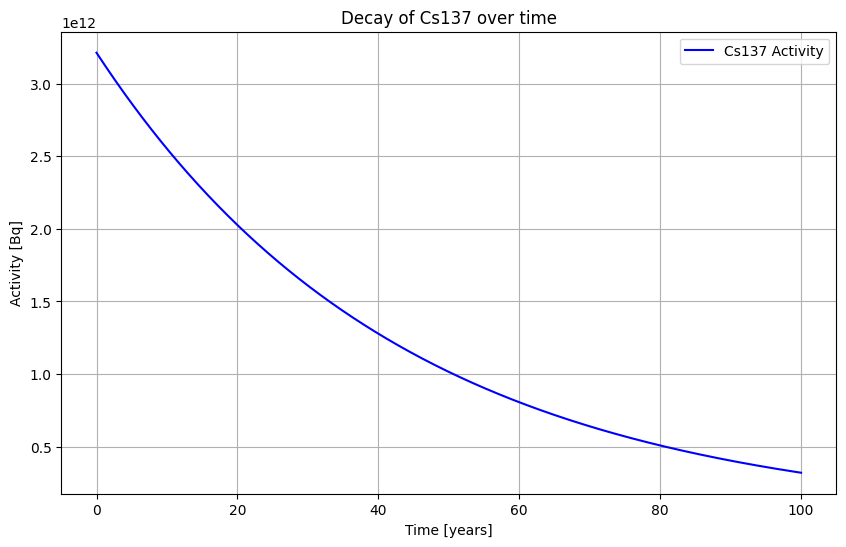

In [64]:
mass = 1.0  # mass in g
time_array = np.linspace(0, 86400*365.25*100, 1000)  # time in seconds
activity_array = cesium_137.massic_activity * mass * np.exp(-cesium_137.decay_constant * time_array)
plt.figure(figsize=(10, 6))
plt.plot(time_array / (86400*365.25), activity_array, label=f"{cesium_137.name} Activity", color='blue')
plt.xlabel("Time [years]")
plt.ylabel("Activity [Bq]")
plt.title(f"Decay of {cesium_137.name} over time")
plt.grid()
plt.legend()
plt.show()